# Instalación e importación de librerías

In [1]:
!pip install -U setuptools pip

In [2]:
!pip install --ignore-installed blinker
!pip install pandas openpyxl xlrd missingno xgboost scikit-learn==1.5.0 optuna meteostat imblearn interpret==0.6.4

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)


In [3]:
# Version de tensorflow
import tensorflow as tf
print(tf.__version__)

2024-12-29 17:47:37.686796: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-29 17:47:37.698878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735494457.712257    1471 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735494457.716331    1471 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-29 17:47:37.730177: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

2.18.0


In [4]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

In [5]:
# Detectar si tensorflow está usando la GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15345758437575287284
xla_global_id: -1
]


W0000 00:00:1735494459.600638    1471 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Importación de datos

In [6]:
path_data = '/tf/notebooks/data'

In [7]:
df_filtered = pd.read_csv(f'{path_data}/df_filtered_multiproveedor.csv')

In [8]:
num_suppliers = 1
min_prc_order = 60
min_PesoLote_list = []

for i in range(num_suppliers):
    min_PesoLote_list.append(f'PrcPesoLote_{i}')

In [9]:
# Filtrar df_filtered para mantener solo los lotes con una suma de porcentaje de peso mayor al umbral en los pesos de min_PesoLote_list
df_filtered = df_filtered[df_filtered[min_PesoLote_list].sum(axis=1) > min_prc_order]

In [10]:
min_orden_prod = 10

# Selección de proveedores con más de 10 lotes
CodProveedor_valids = df_filtered['CodProveedor_0'].value_counts()[df_filtered['CodProveedor_0'].value_counts() > min_orden_prod].keys()

# Filtrar df_filtered para mantener solo los proveedores seleccionados
df_filtered = df_filtered[df_filtered['CodProveedor_0'].isin(CodProveedor_valids)]

In [11]:
len(df_filtered)

4495

# Visualizaciones y estadísticas de datos

### Rendimiento

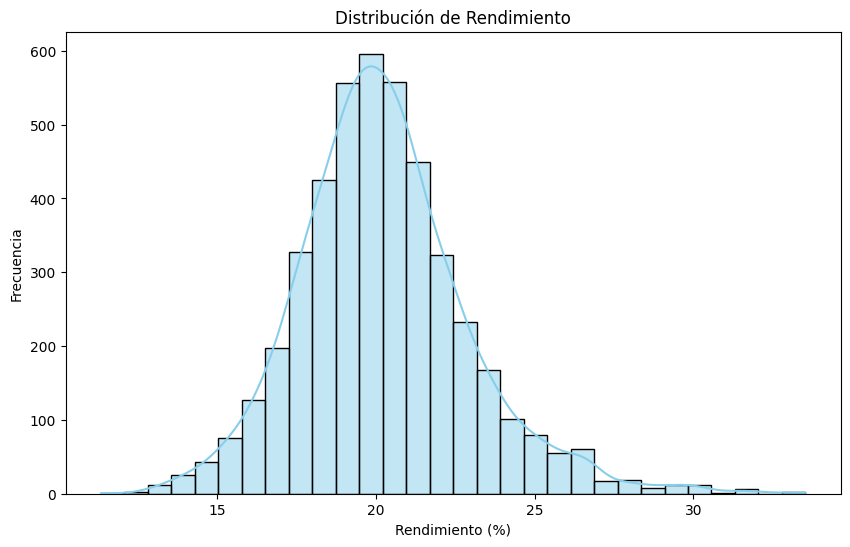

In [12]:
# Distribución de la variable objetivo 'Rendimiento'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['Rendimiento'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Rendimiento')
plt.xlabel('Rendimiento (%)')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
df_filtered['Rendimiento'].describe()

count    4495.000000
mean       20.242731
std         2.688779
min        11.335800
25%        18.542300
50%        20.035000
75%        21.649750
max        33.531200
Name: Rendimiento, dtype: float64

### NumVaciados

In [14]:
df_filtered['NumVaciados'].describe()

count    4495.000000
mean        5.559288
std         0.733512
min         4.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: NumVaciados, dtype: float64

### TEMB1 - TEMB8

In [15]:
temb_cols = [col for col in df_filtered.columns if 'TEMB' in col]
df_filtered[temb_cols].describe()

,TEMB1,TEMB2,TEMB3,TEMB4,TEMB5,TEMB6,TEMB7,TEMB8
count,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000
mean,59.894171,63.698354,70.055217,86.694994,42.432525,9.785184,1.898954,0.224472
std,5.942410,4.091109,5.509448,11.096475,45.892567,28.195832,13.167993,4.311226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.200000,62.000000,68.700000,80.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,64.600000,70.000000,91.200000,0.000000,0.000000,0.000000,0.000000
75%,61.300000,65.200000,73.700000,95.000000,94.000000,0.000000,0.000000,0.000000
max,95.700000,81.500000,97.000000,100.000000,100.000000,100.000000,99.000000,96.000000


### PHB1 - PHB8

In [16]:
phb_cols = [col for col in df_filtered.columns if 'PHB' in col]
df_filtered[phb_cols].describe()

,PHB1,PHB2,PHB3,PHB4,PHB5,PHB6,PHB7,PHB8
count,4495.000000,4495.000000,4495.00000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000
mean,3.572992,3.868587,4.06089,4.210367,4.393259,1.943826,0.420067,0.091190
std,0.463655,0.435712,0.43367,0.487717,0.501113,2.246758,1.314717,0.642559
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,3.600000,3.80000,4.000000,4.200000,0.000000,0.000000,0.000000
50%,3.600000,3.900000,4.10000,4.300000,4.500000,0.000000,0.000000,0.000000
75%,3.800000,4.100000,4.30000,4.500000,4.700000,4.500000,0.000000,0.000000
max,9.200000,14.000000,6.50000,7.000000,7.600000,6.300000,6.100000,6.000000


### DrePh (descartada)

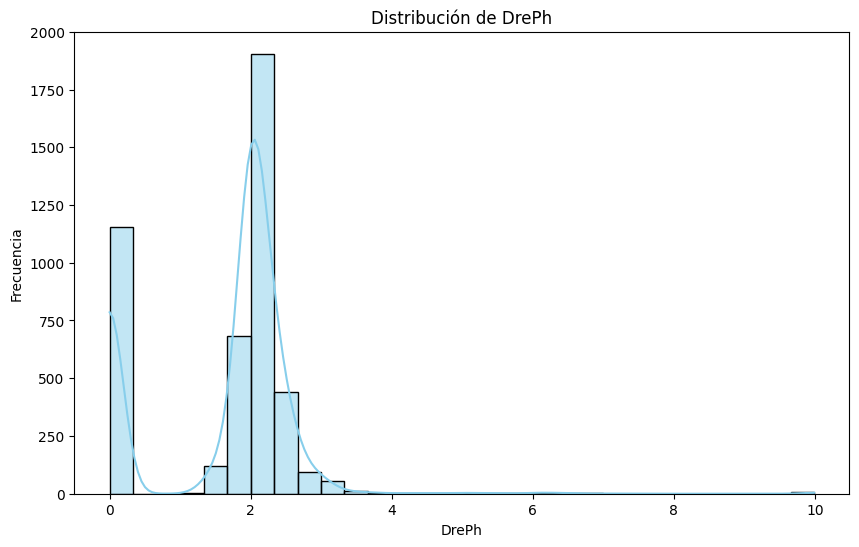

In [17]:
# Distribución de la variable objetivo 'Rendimiento'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['DrePh'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de DrePh')
plt.xlabel('DrePh')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
df_filtered['DrePh'].describe()

count    4495.000000
mean        1.608412
std         1.048426
min         0.000000
25%         0.000000
50%         2.000000
75%         2.160000
max         9.990000
Name: DrePh, dtype: float64

### PromHorasAlmacenamiento

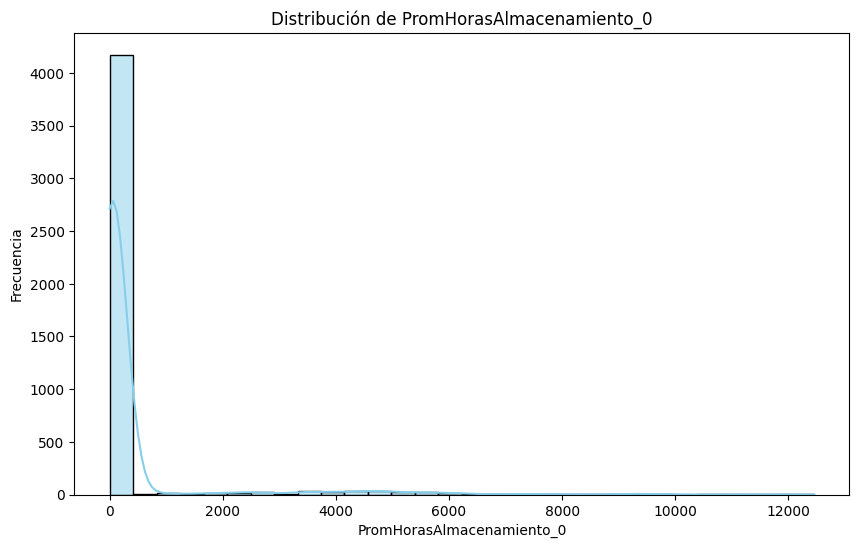

In [19]:
# Distribución de la variable objetivo 'Rendimiento'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['PromHorasAlmacenamiento_0'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de PromHorasAlmacenamiento_0')
plt.xlabel('PromHorasAlmacenamiento_0')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
df_filtered['PromHorasAlmacenamiento_0'].describe()

count     4495.000000
mean       375.551241
std       1304.984188
min          0.000000
25%         15.521848
50%         51.000000
75%        105.434504
max      12456.156665
Name: PromHorasAlmacenamiento_0, dtype: float64

### PrcPesoLote

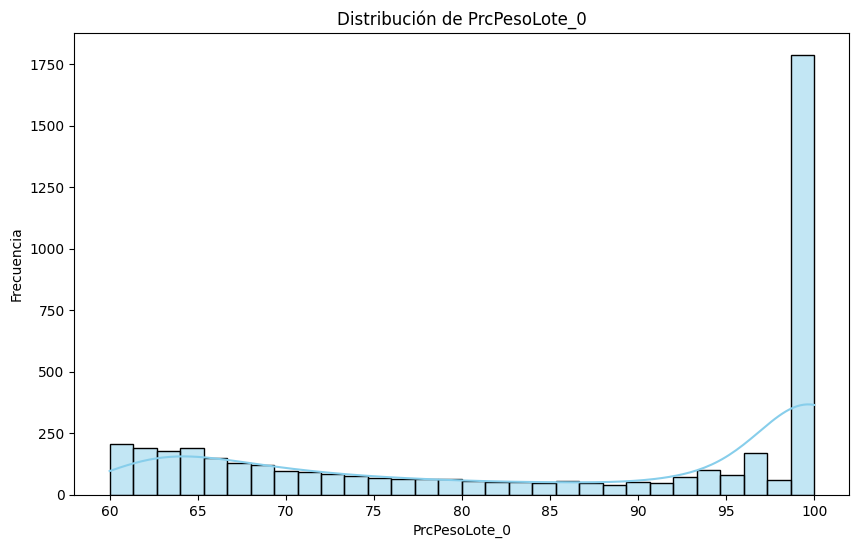

In [21]:
# Distribución de la variable objetivo 'Rendimiento'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['PrcPesoLote_0'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de PrcPesoLote_0')
plt.xlabel('PrcPesoLote_0')
plt.ylabel('Frecuencia')
plt.show()

In [22]:
df_filtered['PrcPesoLote_0'].describe()

count    4495.000000
mean       85.291284
std        15.300472
min        60.002341
25%        68.935079
50%        92.397401
75%       100.000000
max       100.000000
Name: PrcPesoLote_0, dtype: float64

### PrcFresco

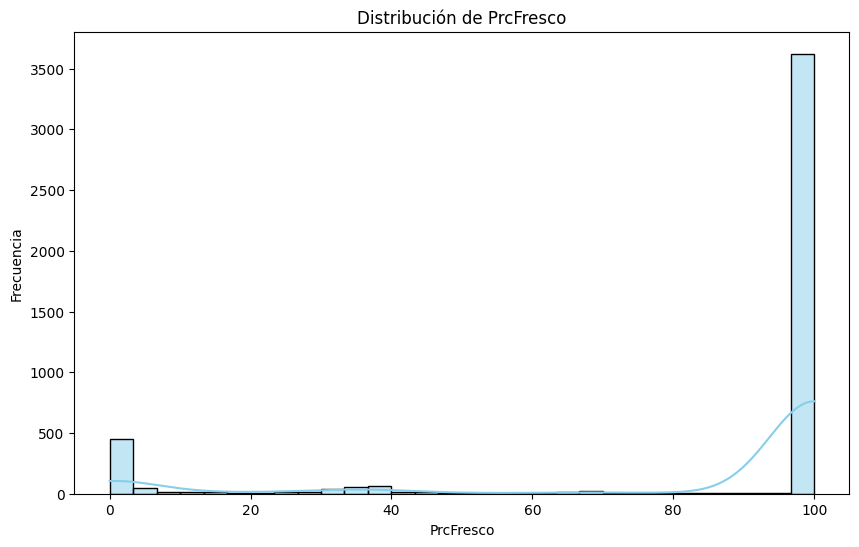

In [23]:
# Distribución de la variable 'PrcFresco'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['PrcFresco'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de PrcFresco')
plt.xlabel('PrcFresco')
plt.ylabel('Frecuencia')
plt.show()

### MinAcido1, MinAcido2

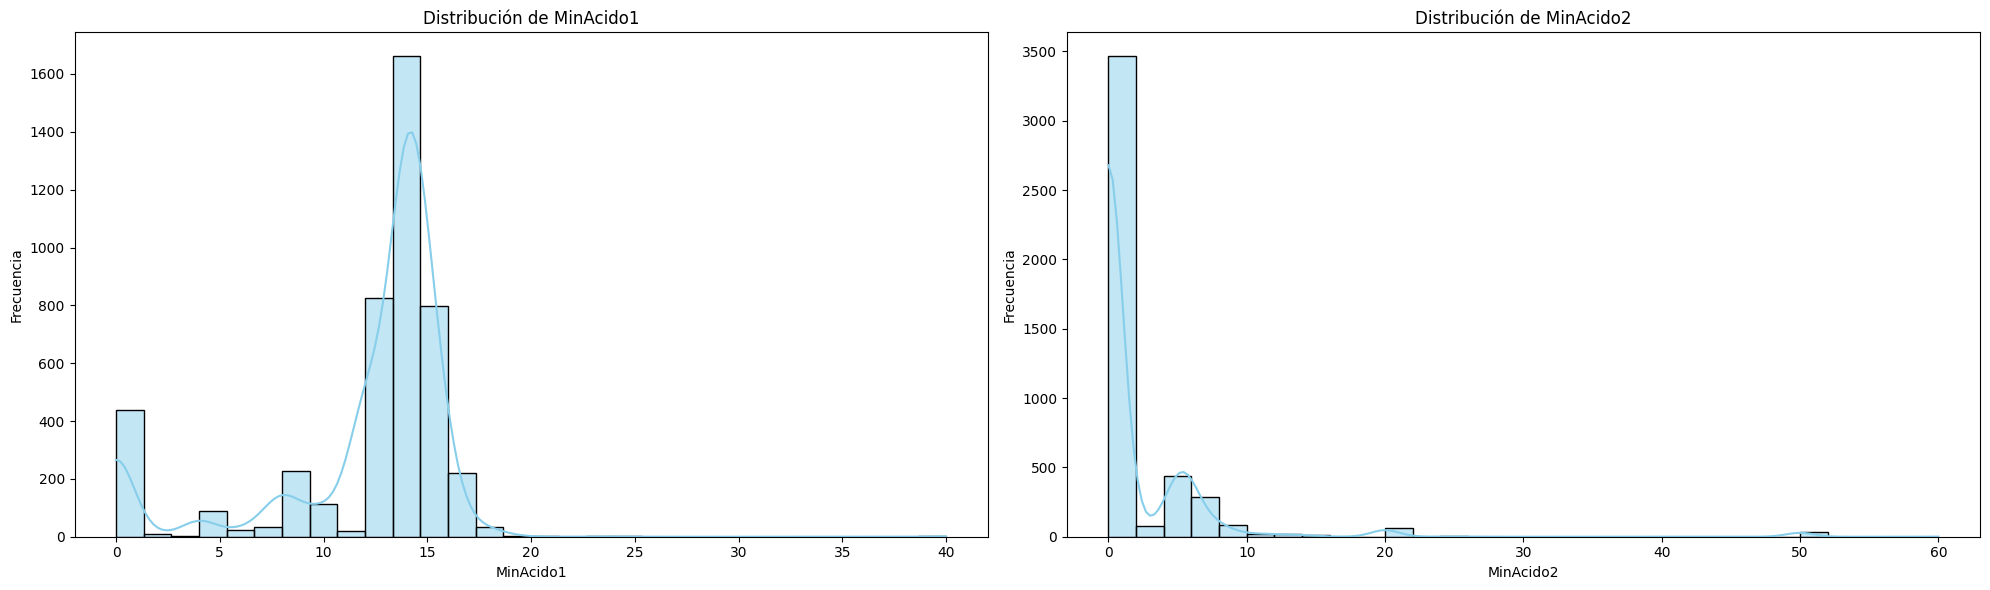

In [24]:
# Crear un lienzo con 2 subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Distribución de la variable 'MinAcido1'
sns.histplot(df_filtered['MinAcido1'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de MinAcido1')
axes[0].set_xlabel('MinAcido1')
axes[0].set_ylabel('Frecuencia')

# Distribución de la variable 'MinAcido2'
sns.histplot(df_filtered['MinAcido2'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribución de MinAcido2')
axes[1].set_xlabel('MinAcido2')
axes[1].set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [25]:
df_filtered['MinAcido1'].describe()

count    4495.000000
mean       11.931257
std         4.606447
min         0.000000
25%        12.000000
50%        14.000000
75%        14.000000
max        40.000000
Name: MinAcido1, dtype: float64

In [26]:
df_filtered['MinAcido2'].describe()

count    4495.000000
mean        1.894549
std         5.548307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        60.000000
Name: MinAcido2, dtype: float64

### CodProveedor

In [27]:
len(set(df_filtered['CodProveedor_0']))

41

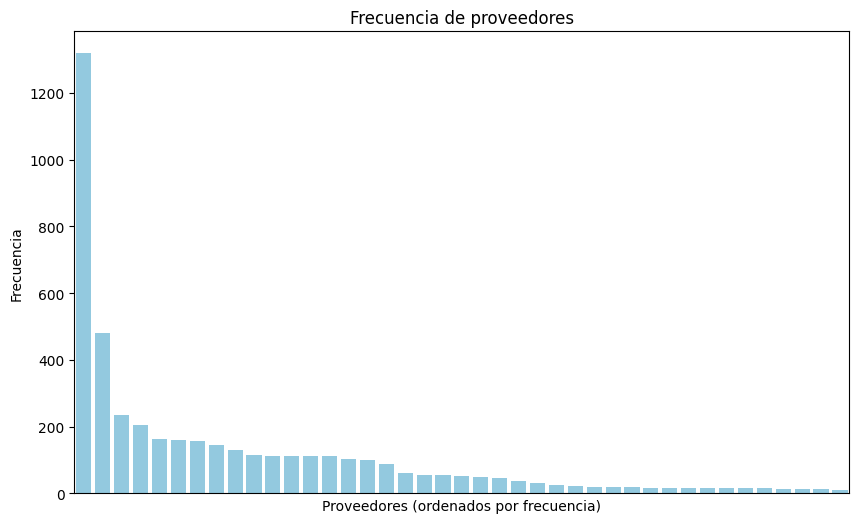

In [28]:
# Distribución de la variable 'CodProveedor_0'
plt.figure(figsize=(10,6))
sns.countplot(x='CodProveedor_0', data=df_filtered, order=df_filtered['CodProveedor_0'].value_counts().index, color='skyblue')
plt.title('Frecuencia de proveedores')
plt.xlabel('Proveedores (ordenados por frecuencia)')
plt.ylabel('Frecuencia')
plt.xticks([])
plt.show()

In [29]:
df_filtered['CodProveedor_0'].value_counts()

CodProveedor_0
11438     1318
10223      480
12211      235
11402      205
10686      163
10200      159
10502      156
10516      146
10563      131
10054      115
10248      113
11802      113
10685      113
11237      111
10206      103
11648      101
710931      87
10013       61
11492       55
11235       55
11491       52
10602       48
711280      45
10230       37
10228       30
10997       24
10625       22
10910       19
10271       19
711508      18
11451       17
11490       17
710101      16
11603       16
10212       15
10613       15
710007      15
10900       14
10623       13
711910      12
11803       11
Name: count, dtype: int64

### RelPromMPGRA

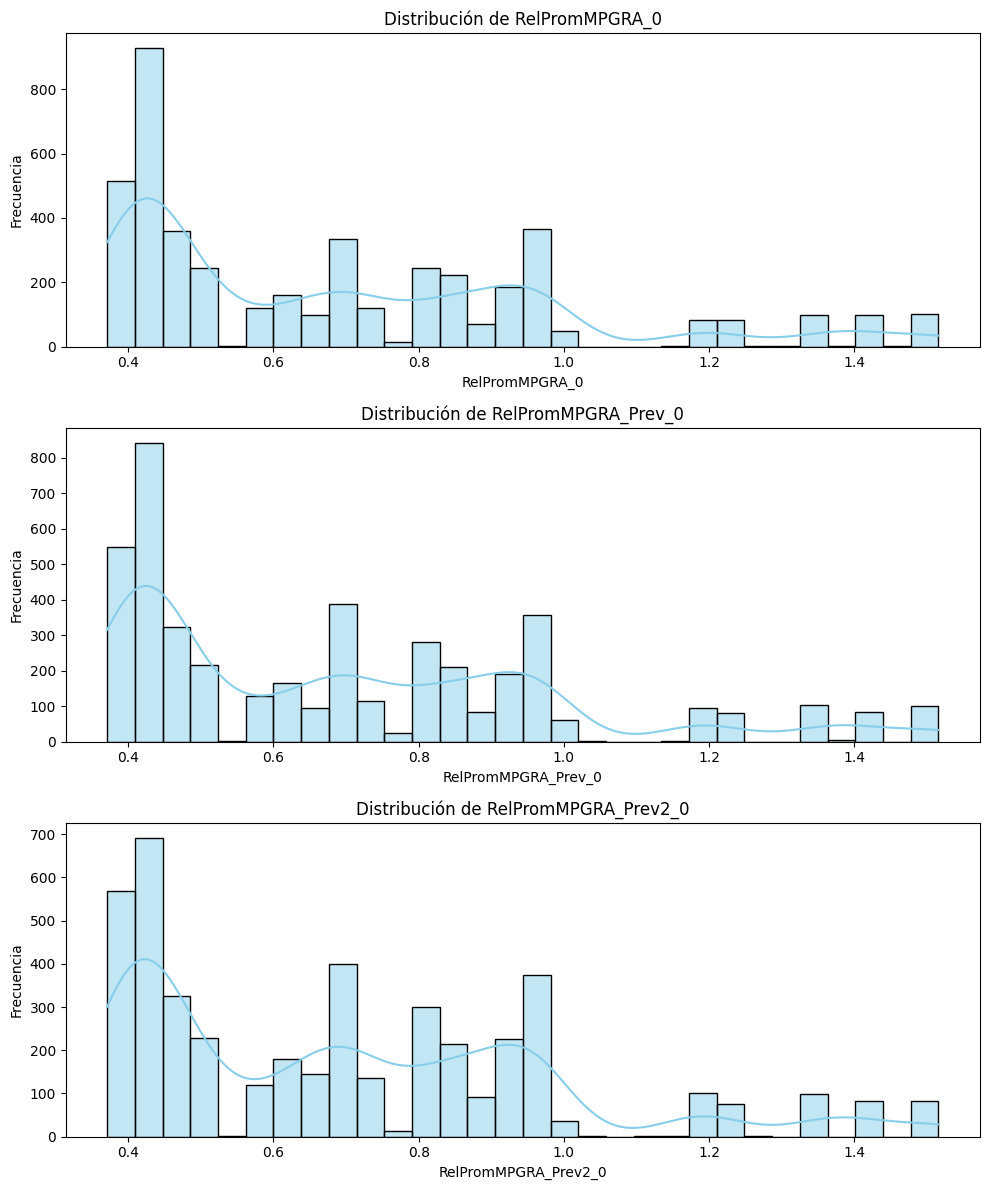

In [30]:
# Distribución de las variables 'RelPromMPGRA_0', 'RelPromMPGRA_Prev_0', 'RelPromMPGRA_Prev2_0'
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Distribución de RelPromMPGRA_0
sns.histplot(df_filtered['RelPromMPGRA_0'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de RelPromMPGRA_0')
axes[0].set_xlabel('RelPromMPGRA_0')
axes[0].set_ylabel('Frecuencia')

# Distribución de RelPromMPGRA_Prev_0
sns.histplot(df_filtered['RelPromMPGRA_Prev_0'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribución de RelPromMPGRA_Prev_0')
axes[1].set_xlabel('RelPromMPGRA_Prev_0')
axes[1].set_ylabel('Frecuencia')

# Distribución de RelPromMPGRA_Prev2_0
sns.histplot(df_filtered['RelPromMPGRA_Prev2_0'], bins=30, kde=True, color='skyblue', ax=axes[2])
axes[2].set_title('Distribución de RelPromMPGRA_Prev2_0')
axes[2].set_xlabel('RelPromMPGRA_Prev2_0')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Temp

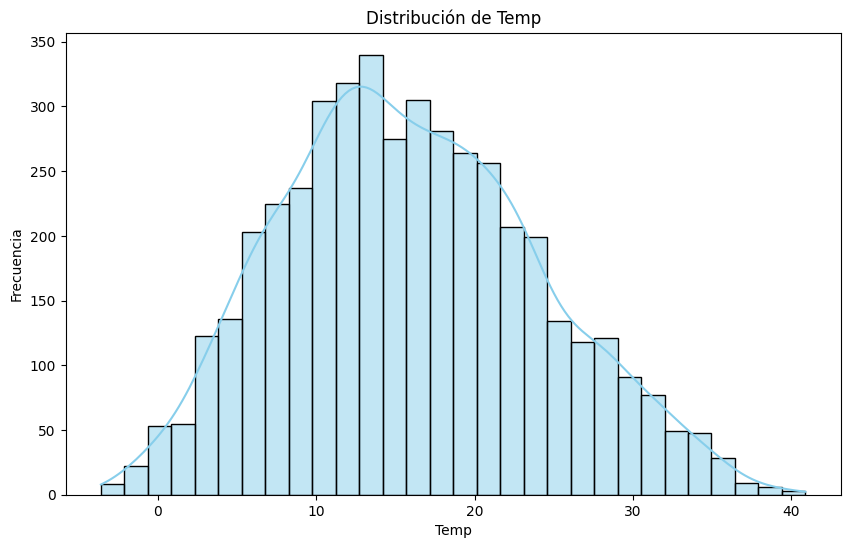

In [31]:
# Distribución de la variable 'Temp'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['Temp'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Temp')
plt.xlabel('Temp')
plt.ylabel('Frecuencia')
plt.show()

### PrcCat1, PrcCat2, PrcCat3

In [32]:
df_filtered['PrcCat1'].mean(), df_filtered['PrcCat2'].mean(), df_filtered['PrcCat3'].mean()

(np.float64(5.982796440489432),
 np.float64(64.15709677419355),
 np.float64(29.860040044493882))

### CodExtractora

In [33]:
len(set(df_filtered['CodExtractora']))

10

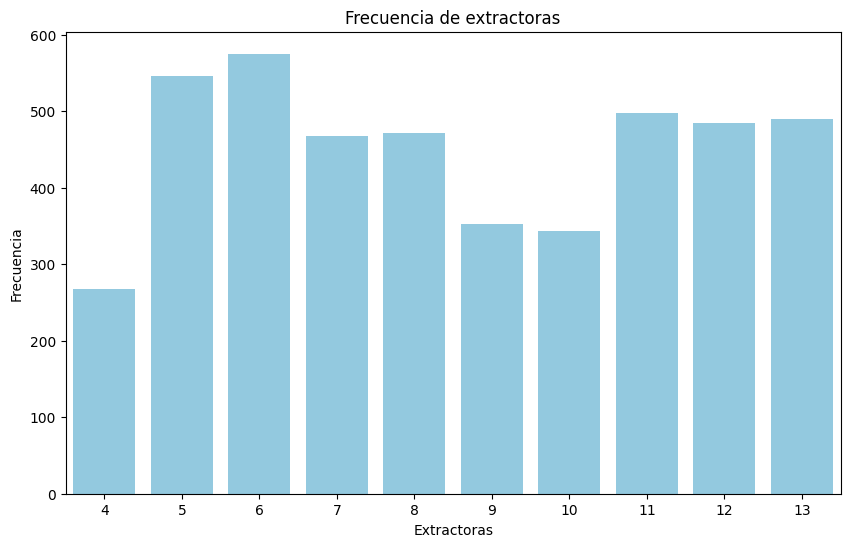

In [34]:
# Distribución de la variable 'CodExtractora'
plt.figure(figsize=(10,6))
sns.countplot(x='CodExtractora', data=df_filtered, color='skyblue')
plt.title('Frecuencia de extractoras')
plt.xlabel('Extractoras')
plt.ylabel('Frecuencia')
#plt.xticks([])
plt.show()

In [35]:
df_filtered['CodExtractora'].value_counts()

CodExtractora
6     575
5     546
11    497
13    490
12    485
8     472
7     468
9     352
10    343
4     267
Name: count, dtype: int64

# Desarrollo y entrenamiento de modelos

## Generación de datos sintéticos

In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas as pd

class SyntheticDataGenerator:
    def __init__(self, min_value=11.0, max_value=51.0):
        self.min_value = min_value
        self.max_value = max_value
        self.scaler = StandardScaler()
                
    def generate_synthetic_data(self, X, y, n_synthetic_samples=None, target='target'):
        """
        Genera datos sintéticos usando principalmente generación basada en distribución.
        """
        if n_synthetic_samples is None:
            n_synthetic_samples = len(X)
        
        # Separar variables categóricas y numéricas
        X_cat = X.select_dtypes(include=['category'])
        X_num = X.select_dtypes(exclude=['category'])
        
        # Generar datos sintéticos en base a la distribución
        print("Generando datos basados en distribución...")
        X_num_synthetic, y_synthetic = self._generate_distribution_based(X_num, y, n_synthetic_samples)
        X_cat_synthetic = self._generate_synthetic_categorical_data(X_cat, n_synthetic_samples)
        
        # Combinar variables numéricas y categóricas
        X_synthetic = pd.concat([X_num_synthetic, X_cat_synthetic], axis=1)
        
        # Combinar con datos originales
        print("Combinando datos...")
        X_combined = pd.concat([X, X_synthetic], ignore_index=True)
        y_combined = np.concatenate([y, y_synthetic])
        
        # Validar y limpiar datos
        print("Validando y limpiando datos...")
        X_combined, y_combined = self._validate_and_clean(X_combined, y_combined)
        
        # Reordenar columnas como en el DataFrame original
        X_combined = X_combined[X.columns]
        
        # Verificar la calidad de los datos
        self._verify_quality(X, y, X_combined, y_combined)
        
        return X_combined, y_combined
    
    def _generate_synthetic_categorical_data(self, X_cat, n_samples):
        """
        Genera datos sintéticos para variables categóricas asumiendo que todas son de tipo entero.
        Mantiene la distribución original y asegura que el tipo de dato sea int64.
        
        Args:
            X_cat: DataFrame con las variables categóricas originales
            n_samples: Número de muestras sintéticas a generar
        
        Returns:
            DataFrame con datos categóricos sintéticos manteniendo las categorías y tipos originales
        """
        synthetic_data = pd.DataFrame()
        
        for column in X_cat.columns:
            # Obtener las categorías como enteros y sus frecuencias
            value_counts = X_cat[column].value_counts()
            
            # Calcular el número de muestras por categoría manteniendo las proporciones
            n_per_category = (value_counts / len(X_cat) * n_samples).round().astype(int)
            
            # Ajustar para asegurar que sumamos exactamente n_samples
            diff = n_samples - n_per_category.sum()
            if diff != 0:
                most_common_cat = value_counts.index[0]
                n_per_category[most_common_cat] += diff
            
            # Generar valores repitiendo cada categoría según su frecuencia
            synthetic_values = []
            for category, count in n_per_category.items():
                # Asegurar que cada categoría es int
                synthetic_values.extend([int(category)] * count)
            
            # Mezclar aleatoriamente los valores
            np.random.shuffle(synthetic_values)
            
            # Crear la serie categórica asegurando tipo int64 para las categorías
            categories = X_cat[column].cat.categories.astype('int64')
            synthetic_data[column] = pd.Categorical(
                np.array(synthetic_values, dtype='int64'),
                categories=categories,
                ordered=X_cat[column].cat.ordered
            )
        
        return synthetic_data
    
    def _generate_distribution_based(self, X, y, n_samples):
        """
        Genera datos sintéticos basados en la distribución de los datos numéricos originales
        """
        # Seleccionar solo columnas numéricas
        X_num = X.select_dtypes(exclude=['category'])
        
        if len(X_num.columns) == 0:
            return pd.DataFrame(index=range(n_samples)), y
        
        # Para las variables numéricas, usar kernel density estimation para mantener mejor la distribución
        X_synthetic = pd.DataFrame()
        for col in X_num.columns:
            kde = stats.gaussian_kde(X_num[col])
            X_synthetic[col] = kde.resample(n_samples)[0]
        
        # Para el target, usar también kernel density estimation
        kde_y = stats.gaussian_kde(y)
        y_synthetic = kde.resample(n_samples)[0]
        
        # Asegurar que los valores estén dentro de los límites físicos
        y_synthetic = np.clip(y_synthetic, self.min_value, self.max_value)
        
        return X_synthetic, y_synthetic
    
    def _validate_and_clean(self, X, y):
        """
        Valida y limpia los datos generados
        """
        # Eliminar valores atípicos extremos
        z_scores = np.abs(stats.zscore(y))
        valid_indices = z_scores < 3
        
        # Asegurar que los valores estén dentro de los límites físicos
        y = np.clip(y, self.min_value, self.max_value)
        
        return X[valid_indices].copy(), y[valid_indices].copy()
    
    def _verify_quality(self, X_orig, y_orig, X_combined, y_combined):
        """
        Verifica la calidad de los datos sintéticos generados
        """
        print("\nVerificación de calidad de datos sintéticos:")
        
        # Estadísticas básicas
        print("\nEstadísticas del target:")
        print(f"Original - Media: {np.mean(y_orig):.2f}, Std: {np.std(y_orig):.2f}")
        print(f"Combinado - Media: {np.mean(y_combined):.2f}, Std: {np.std(y_combined):.2f}")
        
        # Distribución por rangos
        bins = np.linspace(self.min_value, self.max_value, 10)
        hist_orig, _ = np.histogram(y_orig, bins=bins)
        hist_comb, _ = np.histogram(y_combined, bins=bins)
        
        print("\nDistribución por rangos:")
        for i in range(len(bins)-1):
            print(f"Rango {bins[i]:.1f}-{bins[i+1]:.1f}:")
            print(f"  Original: {hist_orig[i]}")
            print(f"  Combinado: {hist_comb[i]}")
        
        # Verificar distribución de variables categóricas
        categorical_columns = X_orig.select_dtypes(include=['category']).columns
        print("\nDistribución de variables categóricas:")
        for col in categorical_columns:
            print(f"\n{col}:")
            print("Original:", X_orig[col].value_counts().to_dict())
            print("Combinado:", X_combined[col].value_counts().to_dict())

## Diseño de modelos y preprocesado

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.base import BaseEstimator, TransformerMixin
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import time

# Configuración de TensorFlow para manejo de memoria más conservador
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


class TargetTransformer(BaseEstimator, TransformerMixin):
    """
    Transformer para normalizar y desnormalizar la variable objetivo (target).
    Mantiene los valores mínimos y máximos para poder revertir la transformación.
    """
    def __init__(self):
        self.min_val = None
        self.max_val = None
    
    def fit(self, y):
        """
        Guarda los valores mínimos y máximos del target
        """
        self.min_val = y.min()
        self.max_val = y.max()
        return self
    
    def transform(self, y):
        """
        Normaliza el target al rango [0,1]
        """
        return (y - self.min_val) / (self.max_val - self.min_val)
    
    def inverse_transform(self, y):
        """
        Revierte la normalización
        """
        return y * (self.max_val - self.min_val) + self.min_val


def manual_cross_validate_nn(model_class, X, y, cv=5):
    """
    Implementa validación cruzada manual para la red neuronal
    """
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    models = []
    
    # Convertir y a numpy array si es pandas Series
    if isinstance(y, pd.Series):
        y = y.values
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"Entrenando fold {fold + 1}/{cv}")
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        # Crear y entrenar un nuevo modelo para cada fold
        model = model_class()
        model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold))
        
        # Calcular RMSE para este fold
        y_pred = model.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
        scores.append(rmse)
        models.append(model)
    
    # Encontrar el mejor modelo
    best_model_idx = np.argmin(scores)
    return np.array(scores), models[best_model_idx]


class CategoricalEmbeddingTransformer(BaseEstimator, TransformerMixin):
    """
    Transformador que aplica embedding a variables categóricas.

    Args:
        BaseEstimator (_type_): _description_
        TransformerMixin (_type_): _description_
    """
    
    def __init__(self, categorical_columns, unknown_value='unknown'):
        self.categorical_columns = categorical_columns
        self.label_encoders = {}
        self.embedding_models = {}
        self.unknown_value = unknown_value
        self.embedding_dims = {}
        
    def calculate_embedding_dim(self, n_categories):
        """
        Calcula la dimensión óptima del embedding basado en el número de categorías.
        Fórmula recomendada: min(600, round(1.6 * n_categories**0.56))
        Ref: https://forums.fast.ai/t/embedding-layer-size-rule/50691
        """
        return min(600, round(1.6 * n_categories**0.56))
        
    def fit(self, X, y=None):
        for col in self.categorical_columns:
            # Agregar valor unknown a los datos de entrenamiento
            unique_values = np.append(X[col].unique(), self.unknown_value)
            n_categories = len(unique_values)
            
            # Calcular dimensión óptima del embedding
            self.embedding_dims[col] = self.calculate_embedding_dim(n_categories)
            print(f"Dimensión de embedding para {col}: {self.embedding_dims[col]} (n_categories: {n_categories})")
            
            le = LabelEncoder()
            le.fit(unique_values.astype(str))
            self.label_encoders[col] = le
            
            embedding_model = MLPRegressor(
                hidden_layer_sizes=(n_categories, self.embedding_dims[col]),
                max_iter=1000,
                random_state=42
            )
            
            encoded_values = le.transform(X[col].astype(str))
            one_hot = np.eye(n_categories)[encoded_values]
            target = np.random.random((len(encoded_values), self.embedding_dims[col]))
            embedding_model.fit(one_hot, target)
            self.embedding_models[col] = embedding_model
            
        return self
    
    def transform(self, X):
        embeddings = []
        for col in self.categorical_columns:
            X_col = X[col].astype(str)
            mask = ~np.isin(X_col, self.label_encoders[col].classes_)
            X_col[mask] = self.unknown_value
            
            encoded_values = self.label_encoders[col].transform(X_col)
            one_hot = np.eye(len(self.label_encoders[col].classes_))[encoded_values]
            embedding = self.embedding_models[col].predict(one_hot)
            embeddings.append(embedding)
        
        result = np.hstack(embeddings)
        
        column_names = [
            f"{col}_emb_{i}" 
            for col in self.categorical_columns 
            for i in range(self.embedding_dims[col])
        ]
        
        return pd.DataFrame(result, columns=column_names, index=X.index)


def create_preprocessing_pipeline(numerical_columns, categorical_columns):
    numeric_transformer = StandardScaler()
    categorical_transformer = CategoricalEmbeddingTransformer(
        categorical_columns=categorical_columns
    )
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])
    
    return preprocessor

def get_transformed_column_names(preprocessor, df, numerical_columns, categorical_columns):
    numeric_features = numerical_columns
    categorical_features = [
        f"{col}_emb_{i}" 
        for col in categorical_columns 
        for i in range(preprocessor.named_transformers_['cat'].embedding_dims[col])
    ]
    return numeric_features + categorical_features


def load_and_prepare_data(df, target, categorical_columns, numerical_columns):
    X = df[categorical_columns + numerical_columns]
    y = df[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate_models(X_train_transformed, X_test_transformed, y_train, y_test, target_transformer, selected_models, params=None):
    
    # Normalización del target
    y_train_normalized = target_transformer.fit(y_train).transform(y_train)
    y_test_normalized = target_transformer.transform(y_test)
    
    if isinstance(X_train_transformed, pd.DataFrame):
        X_train_transformed = X_train_transformed.values
    if isinstance(X_test_transformed, pd.DataFrame):
        X_test_transformed = X_test_transformed.values
       
    if params is None:
        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(
                n_estimators=2427,
                max_depth=16,
                min_samples_split=15,
                min_samples_leaf=2,
                max_features=None,
                n_jobs=-1,
                random_state=42,
                bootstrap=True
            ),
            'XGBoost': xgb.XGBRegressor(
                n_estimators=2925,
                max_depth=22,
                learning_rate=0.06503699158820368,
                min_child_weight=7,
                subsample=0.7005566408513879,
                colsample_bytree=0.8667663837073387,
                gamma=0.05073441831588738,
                reg_alpha=0.051335066298862864,
                reg_lambda=1.6340104999571767,
                random_state=42,
                tree_method='hist',
                n_jobs=-1,
                eval_metric='rmse'
            ),
            'EBM': ExplainableBoostingRegressor(
                outer_bags=12,
                inner_bags=15,
                learning_rate=0.043027557726215374,
                max_rounds=6853,
                min_samples_leaf=17,
                max_leaves=22,
                interactions=5,
                n_jobs=-1,
                random_state=42
            )
        }
    else:

        rf_params = {**params['random_forest'], 'random_state': 42, 'n_jobs': -1} if 'random_forest' in params.keys() else {
            'n_estimators': 2427,
            'max_depth': 16,
            'min_samples_split': 15,
            'min_samples_leaf': 2,
            'max_features': None,
            'n_jobs': -1,
            'random_state': 42,
            'bootstrap': True}
        xgb_params = {**params['xgboost'], 'random_state': 42, 'tree_method': 'hist', 'n_jobs': -1, 'eval_metric': 'rmse'} if 'xgboost' in params.keys() else {
            'n_estimators': 2925,
            'max_depth': 22,
            'learning_rate': 0.06503699158820368,
            'min_child_weight': 7,
            'subsample': 0.7005566408513879,
            'colsample_bytree': 0.8667663837073387,
            'gamma': 0.05073441831588738,
            'reg_alpha': 0.051335066298862864,
            'reg_lambda': 1.6340104999571767,
            'random_state': 42,
            'tree_method': 'hist',
            'n_jobs': -1,
            'eval_metric': 'rmse'}
        ebm_params = {**params['ebm'], 'random_state': 42, 'n_jobs': -1} if 'ebm' in params.keys() else {
            'outer_bags': 12,
            'inner_bags': 15,
            'learning_rate': 0.043027557726215374,
            'max_rounds': 6853,
            'min_samples_leaf': 17,
            'max_leaves': 22,
            'interactions': 5,
            'random_state': 42,
            'n_jobs': -1
        }

        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(
                **rf_params
            ),
            'XGBoost': xgb.XGBRegressor(
                **xgb_params
            ),
            'EBM': ExplainableBoostingRegressor(
                **ebm_params
            )
        }
    
    results = {}
    best_models = {}
    
    # Deja sólo los modelos seleccionados
    models = {name: model for name, model in models.items() if name in selected_models}
    
    for name, model in models.items():
        print(f"\n{name.upper()}")
        print(f"\nEntrenando {name}:")
        
        initial_time = time.time()
        # Validación cruzada normal para otros modelos
        cv_scores = cross_validate(
            model, X_train_transformed, y_train_normalized,
            cv=5, 
            scoring={'rmse': 'neg_root_mean_squared_error',
                    'mae': 'neg_mean_absolute_error',
                    'r2': 'r2'},
            return_estimator=True,
            n_jobs=-1
        )
        
        rmse_scores = -cv_scores['test_rmse']
        best_model_idx = np.argmin(rmse_scores)
        best_model = cv_scores['estimator'][best_model_idx]
        y_pred_normalized = best_model.predict(X_test_transformed)
        y_pred = target_transformer.inverse_transform(y_pred_normalized)
        final_time = time.time()
        
        print(f"CV RMSE scores: {rmse_scores}")
        print(f"Mean CV RMSE: {rmse_scores.mean():.4f}")
        
        final_metrics = {
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }
        
        results[name] = {
            'cv_rmse_scores': rmse_scores,
            'cv_rmse_mean': rmse_scores.mean(),
            'best_model_metrics': final_metrics
        }
        best_models[name] = best_model
        
        print("\nMétricas del mejor modelo:")
        for metric, value in final_metrics.items():
            print(f"{metric.upper()}: {value:.4f}")
        
        print(f"\nTiempo de entrenamiento: {final_time - initial_time:.2f} segundos")
    
    return best_models, results

W0000 00:00:1735494463.175199    1471 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Función de visualización

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

def plot_predictions_vs_actual(y_true, y_pred, model_name, ax=None):
    """
    Crea un gráfico de dispersión de predicciones vs valores reales para un modelo específico.
    
    Args:
        y_true: Valores reales
        y_pred: Predicciones del modelo
        model_name: Nombre del modelo para el título
        ax: Eje de matplotlib donde graficar. Si es None, se crea uno nuevo.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    
    # Crear el gráfico de dispersión
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5, ax=ax)
    
    # Añadir línea de referencia y=x
    min_val = min(10, 40)
    max_val = max(10, 40)
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Línea de referencia (y=x)')
    
    # Calcular R²
    r2 = np.corrcoef(y_true, y_pred)[0, 1]**2
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    # Configurar el gráfico
    ax.set_title(f'{model_name}\nR² = {r2:.4f}\nMAE = {mae:.4f}\nMSE = {mse:.4f}\nRMSE = {rmse:.4f}')
    ax.set_xlabel('Valores reales')
    ax.set_ylabel('Predicciones')
    ax.set_ylim(min_val - 2, max_val + 2)
    ax.set_xlim(min_val - 2, max_val + 2)
    ax.legend()
    
    # Ajustar los límites para que sean iguales en ambos ejes
    ax.set_aspect('equal')
    return ax

def visualize_all_models_predictions(trained_models, X_test_transformed, y_test, target_transformer):
    """
    Crea un panel de gráficos comparando las predicciones de todos los modelos.
    
    Args:
        trained_models: Diccionario con los modelos entrenados
        X_test: Datos de prueba
        y_test: Valores reales de prueba
    """
    # Calcular el número de filas necesarias (3 columnas)
    n_models = len(trained_models)
    n_cols = 2
    n_rows = ceil(n_models / n_cols)
    
    # Crear la figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Comparación de Predicciones vs Valores Reales', 
                fontsize=16, y=1.02)
    
    # Aplanar el array de ejes si hay múltiples filas
    if n_rows > 1:
        axes = axes.flatten()
    elif n_rows == 1:
        axes = [axes] if n_models == 1 else axes
    
    df_y_pred = pd.DataFrame()
    
    # Iterar sobre los modelos y crear los gráficos
    for i, (name, model) in enumerate(trained_models.items()):
        y_pred_normalized = model.predict(X_test_transformed)
        y_pred = target_transformer.inverse_transform(y_pred_normalized)
        
        df_y_pred[f"Rendimiento_{name}"] = y_pred
        
        # Crear el gráfico
        plot_predictions_vs_actual(y_test, y_pred, name, ax=axes[i])
    
    # Ocultar los subplots vacíos si los hay
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Ajustar el espaciado
    plt.tight_layout()
    plt.show()
    
    return df_y_pred

## Función de análisis de modelo EBM

In [39]:
# Análisis del modelo EBM
def analyze_ebm_model(ebm_model, feature_names, X_test):
    """
    Analiza y muestra las explicaciones del modelo EBM, manejando correctamente
    las características originales y los términos de interacción
    """
    # Obtener explicaciones globales
    global_explanations = ebm_model.explain_global()
    scores = global_explanations.data()['scores']
    
    # Imprimir información de diagnóstico
    print("\nInformación de diagnóstico:")
    print(f"Número de características en X_test: {X_test.shape[1]}")
    print(f"Número de nombres de características: {len(feature_names)}")
    print(f"Número total de scores (incluyendo interacciones): {len(scores)}")
    
    # Imprimir importancia de características principales
    print("\nImportancia de características principales según EBM:")
    feature_importance = {}
    for i in range(len(feature_names)):
        feature_importance[feature_names[i]] = scores[i]
        print(f"{feature_names[i]}: {scores[i]:.4f}")
    
    # Imprimir términos de interacción si existen
    if len(scores) > len(feature_names):
        print("\nTérminos de interacción detectados:")
        for i in range(len(feature_names), len(scores)):
            print(f"Interacción {i-len(feature_names)}: {scores[i]:.4f}")
    
    # Obtener las características más importantes
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    print("\nTop 20 características más importantes:")
    for feature, importance in sorted_features[:20]:
        print(f"{feature}: {importance:.4f}")
    
    # Obtener explicaciones locales para algunas muestras
    local_explanations = ebm_model.explain_local(X_test[:5])
    
    return global_explanations, local_explanations, feature_importance

## Modelos simplificados

### Procesamiento de datos

In [40]:
n_synthetic_samples = 0

# Definir columnas a utilizar
categorical_columns = []
for i in range(num_suppliers):
    categorical_columns += [f'CodProveedor_{i}']
    
numerical_columns = ['Temp']
for i in range(num_suppliers):
    numerical_columns += [f'RelPromMPGRA_{i}', f'RelPromMPGRA_Prev_{i}', f'RelPromMPGRA_Prev2_{i}']
target = 'Rendimiento'

# Reasigna las variables categóricas como categóricas
df_filtered[categorical_columns] = df_filtered[categorical_columns].astype('category')

# Cargar y dividir datos
print("\nCargando datos...")
X_train, X_test, y_train, y_test = load_and_prepare_data(df_filtered, target, categorical_columns, numerical_columns)

# Generar datos sintéticos

print("\nGenerando datos sintéticos...")
synthetic_generator = SyntheticDataGenerator(
    min_value=y_train.min(),
    max_value=y_train.max()
)

if n_synthetic_samples == 0:
    X_train_augmented, y_train_augmented = X_train, y_train
else:
    X_train_augmented, y_train_augmented = synthetic_generator.generate_synthetic_data(
        X_train, y_train,
        n_synthetic_samples=n_synthetic_samples,
        target=target
    )

# Crear pipeline normal
preprocessor = create_preprocessing_pipeline(numerical_columns, categorical_columns)
target_transformer = TargetTransformer()


print("\nPreparando datos...")
X_train_transformed = preprocessor.fit_transform(X_train_augmented)
X_test_transformed = preprocessor.transform(X_test)


Cargando datos...

Generando datos sintéticos...

Preparando datos...
Dimensión de embedding para CodProveedor_0: 13 (n_categories: 42)


### Entrenamiento

In [41]:
# Entrenar y evaluar modelos
selected_models = [
    'Linear Regression',
    'Random Forest',
    'XGBoost',
    #'Gradient Boosting',
    'EBM',
    #'Neural Network'
]

trained_models, results = train_and_evaluate_models(
    X_train_transformed, X_test_transformed, y_train_augmented, y_test, target_transformer, selected_models
)


LINEAR REGRESSION

Entrenando Linear Regression:
CV RMSE scores: [0.11790221 0.12540304 0.12351638 0.12227782 0.12423071]
Mean CV RMSE: 0.1227

Métricas del mejor modelo:
RMSE: 2.5785
MAE: 1.9643
R2: 0.0493

Tiempo de entrenamiento: 0.96 segundos

RANDOM FOREST

Entrenando Random Forest:
CV RMSE scores: [0.09325795 0.09243397 0.09215853 0.10022765 0.09227138]
Mean CV RMSE: 0.0941

Métricas del mejor modelo:
RMSE: 1.8507
MAE: 1.3924
R2: 0.5103

Tiempo de entrenamiento: 7.34 segundos

XGBOOST

Entrenando XGBoost:
CV RMSE scores: [0.09227781 0.09351231 0.09183502 0.10046783 0.09441097]
Mean CV RMSE: 0.0945

Métricas del mejor modelo:
RMSE: 1.8660
MAE: 1.4204
R2: 0.5021

Tiempo de entrenamiento: 1.10 segundos

EBM

Entrenando EBM:
CV RMSE scores: [0.09388024 0.09674588 0.09473781 0.09862603 0.09735836]
Mean CV RMSE: 0.0963

Métricas del mejor modelo:
RMSE: 1.8899
MAE: 1.4230
R2: 0.4893

Tiempo de entrenamiento: 19.52 segundos


### Análisis de resultados

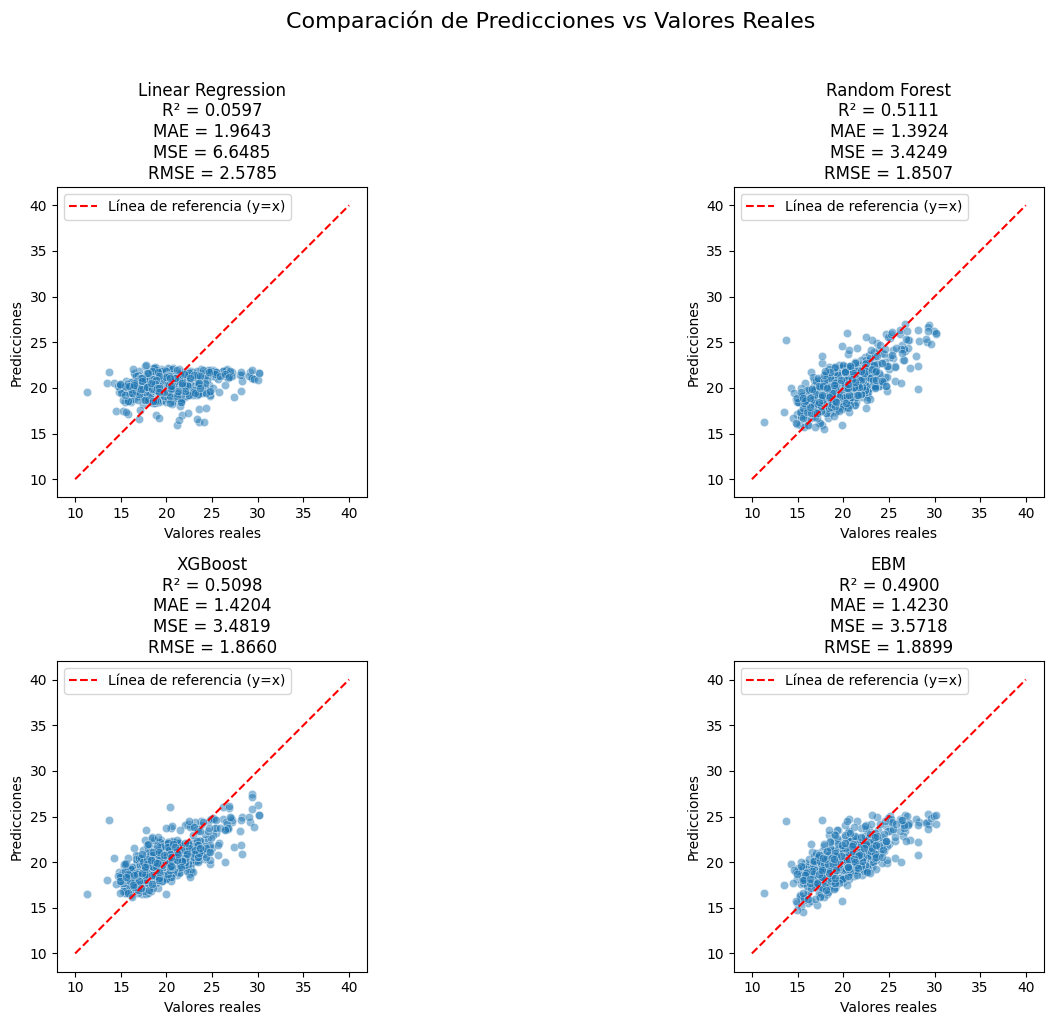

In [42]:
df_y_pred = visualize_all_models_predictions(trained_models, X_test_transformed, y_test, target_transformer)

In [43]:
if 'EBM' in results:
    print("\nAnálisis del modelo EBM:")
    print("\nMétricas de rendimiento:")
    print(results['EBM']['best_model_metrics'])
    
    # Analizar el modelo
    ebm_model = trained_models['EBM']
  
    feature_names = get_transformed_column_names(preprocessor, X_train_transformed, numerical_columns, categorical_columns)
    global_exp, local_exp, feature_importance = analyze_ebm_model(ebm_model, feature_names, X_test_transformed)


Análisis del modelo EBM:

Métricas de rendimiento:
{'rmse': np.float64(1.8899330444745996), 'mae': np.float64(1.4230364276499317), 'r2': 0.48926699255657913}

Información de diagnóstico:
Número de características en X_test: 17
Número de nombres de características: 17
Número total de scores (incluyendo interacciones): 22

Importancia de características principales según EBM:
Temp: 0.0063
RelPromMPGRA_0: 0.0124
RelPromMPGRA_Prev_0: 0.0105
RelPromMPGRA_Prev2_0: 0.0117
CodProveedor_0_emb_0: 0.0041
CodProveedor_0_emb_1: 0.0042
CodProveedor_0_emb_2: 0.0053
CodProveedor_0_emb_3: 0.0047
CodProveedor_0_emb_4: 0.0056
CodProveedor_0_emb_5: 0.0047
CodProveedor_0_emb_6: 0.0055
CodProveedor_0_emb_7: 0.0055
CodProveedor_0_emb_8: 0.0048
CodProveedor_0_emb_9: 0.0036
CodProveedor_0_emb_10: 0.0046
CodProveedor_0_emb_11: 0.0048
CodProveedor_0_emb_12: 0.0055

Términos de interacción detectados:
Interacción 0: 0.0037
Interacción 1: 0.0039
Interacción 2: 0.0037
Interacción 3: 0.0039
Interacción 4: 0.0038

T

In [44]:
# Calcula la importancia de las características categóricas
for emb_feature in categorical_columns:
    # Busca todas las claves en feature_importance que contengan el nombre de la variable categórica
    emb_keys = [key for key in feature_importance.keys() if emb_feature in key]
    emb_keys = sorted(emb_keys, key=lambda x: int(x.split('_')[-1]))
    emb_importance = sum([feature_importance[key] for key in emb_keys])
    feature_importance[emb_feature] = emb_importance
    for key in emb_keys:
        del feature_importance[key]

In [45]:
# Ordenar las características por importancia
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}
feature_importance

{'CodProveedor_0': np.float64(0.06284592713638151),
 'RelPromMPGRA_0': np.float64(0.012383262244091807),
 'RelPromMPGRA_Prev2_0': np.float64(0.011678031353395374),
 'RelPromMPGRA_Prev_0': np.float64(0.010520971473442676),
 'Temp': np.float64(0.00634356984807122)}

# Análisis de impacto

In [55]:
df_pred = pd.concat(
    [
        X_test.reset_index(drop=True, inplace=False),
        df_filtered.loc[X_test.index, 'PesoLote_Subtotal_0'].reset_index(drop=True, inplace=False),
        y_test.reset_index(drop=True, inplace=False),
        df_y_pred['Rendimiento_EBM'].reset_index(drop=True, inplace=False)
    ], axis=1
)
df_pred.head()

,CodProveedor_0,Temp,RelPromMPGRA_0,RelPromMPGRA_Prev_0,RelPromMPGRA_Prev2_0,PesoLote_Subtotal_0,Rendimiento,Rendimiento_EBM
0,10685,32.0,0.626567,0.585464,0.579946,11340.0,17.6467,21.180943
1,10686,26.6,0.460816,0.623755,0.825137,15840.5,21.0915,19.671830
2,10206,11.9,0.425474,0.486364,0.569818,17382.0,20.6536,21.742075
3,11235,27.6,1.219101,1.417026,1.515789,13810.5,20.3234,20.958756
4,10223,20.6,0.974901,0.950734,0.926837,10457.0,25.1470,25.060644


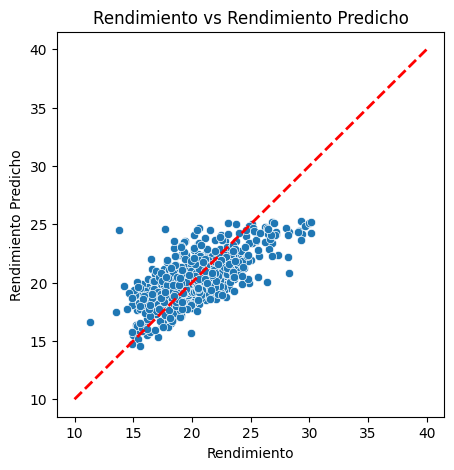

In [56]:
# Graficar Rendimiento vs Rendimiento Predicho
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Rendimiento', y='Rendimiento_EBM', data=df_pred)
plt.title('Rendimiento vs Rendimiento Predicho')
plt.xlabel('Rendimiento')
plt.ylabel('Rendimiento Predicho')
plt.plot([10, 40], [10, 40], color='red', lw=2, linestyle='--')
plt.show()

In [57]:
# Calcula el promedio del rendimiento real de cada proveedor y la cantidad de casos
df_promedio = df_pred.groupby('CodProveedor_0', observed=True).agg(
    {'Rendimiento': 'mean', 'Rendimiento_EBM': 'mean', 'Temp': 'count'}
). sort_values('Rendimiento', ascending=False).reset_index()
df_promedio.head()

,CodProveedor_0,Rendimiento,Rendimiento_EBM,Temp
0,10271,25.591925,24.604858,4
1,10900,24.820400,19.952206,1
2,10223,23.743785,23.530014,79
3,11492,22.262860,21.155347,5
4,10613,22.176200,22.153222,4


In [58]:
# Obtiene código de proveedor con mayor rendimiento promedio
cod_proveedor_max_rendimiento = df_promedio['CodProveedor_0'].iloc[0]
cod_proveedor_min_rendimiento = df_promedio['CodProveedor_0'].iloc[-1]

print(f"Código de proveedor con mayor rendimiento promedio: {cod_proveedor_max_rendimiento}")
print(f"Código de proveedor con menor rendimiento promedio: {cod_proveedor_min_rendimiento}")

Código de proveedor con mayor rendimiento promedio: 10271
Código de proveedor con menor rendimiento promedio: 10623


In [59]:
df_pred_best = df_pred[['CodProveedor_0', 'Temp', 'RelPromMPGRA_0', 'RelPromMPGRA_Prev_0', 'RelPromMPGRA_Prev2_0']].copy()
df_pred_best.loc[:, 'CodProveedor_0'] = cod_proveedor_max_rendimiento

df_pred_worst = df_pred[['CodProveedor_0', 'Temp', 'RelPromMPGRA_0', 'RelPromMPGRA_Prev_0', 'RelPromMPGRA_Prev2_0']].copy()
df_pred_worst.loc[:, 'CodProveedor_0'] = cod_proveedor_min_rendimiento

In [60]:
X_test_best_transformed = preprocessor.transform(df_pred_best)
X_test_worst_transformed = preprocessor.transform(df_pred_worst)

In [61]:
model = trained_models['EBM']

y_pred_best_normalized = model.predict(X_test_best_transformed)
y_pred_best = target_transformer.inverse_transform(y_pred_best_normalized)

y_pred_worst_normalized = model.predict(X_test_worst_transformed)
y_pred_worst = target_transformer.inverse_transform(y_pred_worst_normalized)

In [62]:
# Agrega las predicciones del mejor y peor proveedor al DataFrame
df_pred = pd.concat(
    [
        df_pred,
        pd.DataFrame({'Rendimiento_mejor': y_pred_best}),
        pd.DataFrame({'Rendimiento_peor': y_pred_worst})
    ],
    axis=1
)

In [70]:
df_pred['PesoRendimiento'] = df_pred['Rendimiento'] * df_pred['PesoLote_Subtotal_0'] / 100
df_pred['PesoRendimiento_EBM'] = df_pred['Rendimiento_EBM'] * df_pred['PesoLote_Subtotal_0'] / 100
df_pred['PesoRendimiento_mejor'] = df_pred['Rendimiento_mejor'] * df_pred['PesoLote_Subtotal_0'] / 100
df_pred['PesoRendimiento_peor'] = df_pred['Rendimiento_peor'] * df_pred['PesoLote_Subtotal_0'] / 100

In [99]:
total_mp = df_pred['PesoLote_Subtotal_0'].sum()
total_rendimiento = df_pred['PesoRendimiento'].sum() / total_mp * 100
total_rendimiento_EBM = df_pred['PesoRendimiento_EBM'].sum() / total_mp * 100
total_rendimiento_mejor = df_pred['PesoRendimiento_mejor'].sum() / total_mp * 100
total_rendimiento_peor = df_pred['PesoRendimiento_peor'].sum() / total_mp * 100

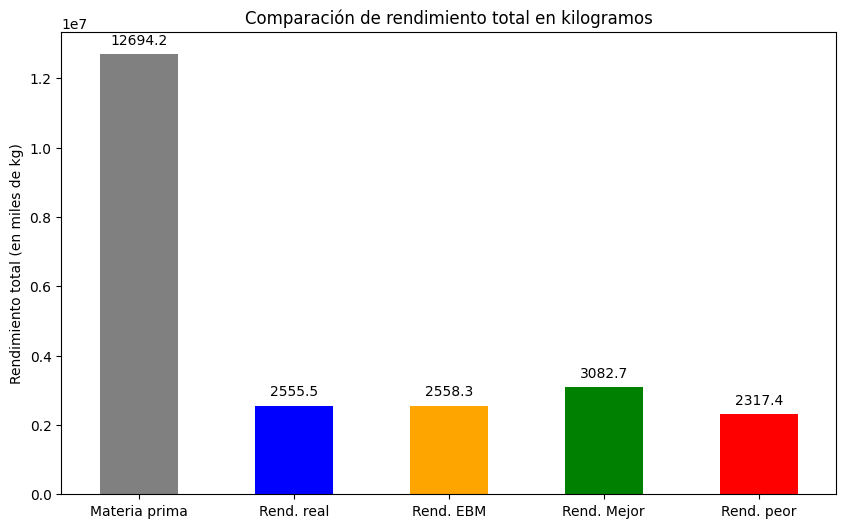

In [100]:
# Gráfico de barras que compara el rendimiento real con el predicho
plt.figure(figsize=(10, 6))
ax = df_pred[['PesoLote_Subtotal_0', 'PesoRendimiento', 'PesoRendimiento_EBM', 'PesoRendimiento_mejor', 'PesoRendimiento_peor']].sum().plot(kind='bar', color=['grey', 'blue', 'orange', 'green', 'red'])

# Agregar el valor en miles a lo alto de cada columna
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1000:.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparación de rendimiento total en kilogramos')
plt.ylabel('Rendimiento total (en miles de kg)')
plt.xticks([0, 1, 2, 3, 4], ['Materia prima', 'Rend. real', 'Rend. EBM', 'Rend. Mejor', 'Rend. peor'], rotation=0)
plt.show()

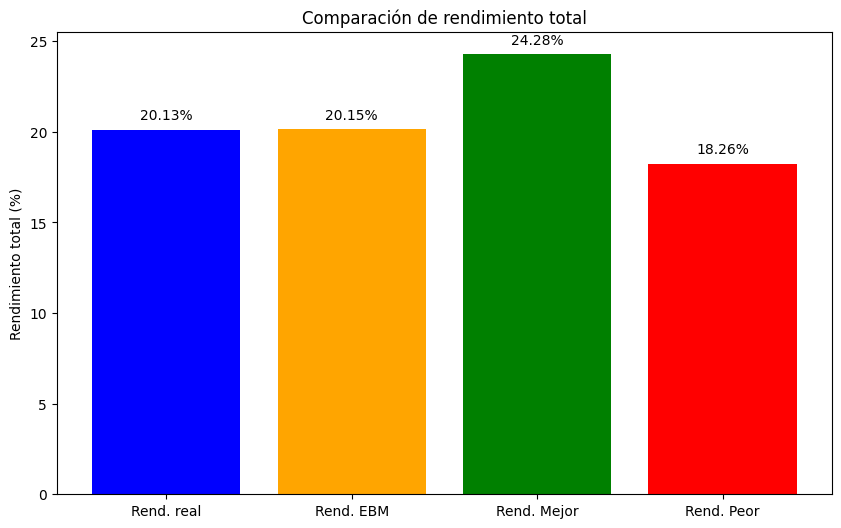

In [102]:
# Gráfico de barras que compara el rendimiento real con el predicho
plt.figure(figsize=(10, 6))
rendimientos = [total_rendimiento, total_rendimiento_EBM, total_rendimiento_mejor, total_rendimiento_peor]
labels = ['Rend. real', 'Rend. EBM', 'Rend. Mejor', 'Rend. Peor']
colors = ['blue', 'orange', 'green', 'red']

ax = plt.bar(labels, rendimientos, color=colors)

# Agregar el valor en porcentaje a lo alto de cada columna
for p in ax:
    height = p.get_height()
    plt.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparación de rendimiento total')
plt.ylabel('Rendimiento total (%)')
plt.show()

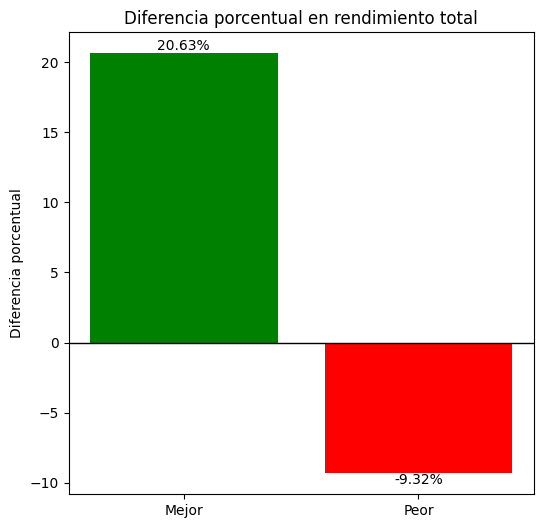

In [103]:
# Gráfico que muestre la diferencia porcentual entre elegir el mejor y el peor proveedor respecto al rendimiento real
diff_mejor = (total_rendimiento_mejor - total_rendimiento) / total_rendimiento * 100
diff_peor = (total_rendimiento_peor - total_rendimiento) / total_rendimiento * 100

plt.figure(figsize=(6, 6))
bars = plt.bar(['Mejor', 'Peor'], [diff_mejor, diff_peor], color=['green', 'red'])
plt.title('Diferencia porcentual en rendimiento total')
plt.ylabel('Diferencia porcentual')
plt.axhline(0, color='black', lw=1)

# Añadir el porcentaje a lo alto y lo bajo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom' if yval > 0 else 'top')

plt.show()

In [106]:
# Precio promedio materia prima y kilos comprados en diciembre de 2023
precio_mp = 0.35825
kilos_mp = 3041962
costo_mp = precio_mp * kilos_mp

In [109]:
kilos_gelatina = total_rendimiento * kilos_mp / 100
kilos_gelatina_mejor = total_rendimiento_mejor * kilos_mp / 100
kilos_gelatina_peor = total_rendimiento_peor * kilos_mp / 100

In [117]:
print(f"Kilos de gelatina producidos con un rendimiento de gelatina real: {kilos_gelatina:.0f}")
print(f"Kilos de gelatina producidos con un rendimiento de gelatina en el mejor de los casos (el mejor proveedor): {kilos_gelatina_mejor:.0f}")
print(f"Kilos de gelatina producidos con un rendimiento de gelatina en el peor de los casos (el peor proveedor): {kilos_gelatina_peor:.0f}")

Kilos de gelatina producidos con un rendimiento de gelatina real: 612384
Kilos de gelatina producidos con un rendimiento de gelatina en el mejor de los casos (el mejor proveedor): 738719
Kilos de gelatina producidos con un rendimiento de gelatina en el peor de los casos (el peor proveedor): 555332


In [112]:
costo_gelatina = costo_mp / kilos_gelatina
costo_gelatina_mejor = costo_mp / kilos_gelatina_mejor
costo_gelatina_peor = costo_mp / kilos_gelatina_peor

In [121]:
print(f"Costo de producción por kilo de gelatina con un rendimiento de gelatina real: {costo_gelatina:.4f} €")
print(f"Costo de producción por kilo de gelatina con un rendimiento de gelatina en el mejor de los casos (el mejor proveedor): {costo_gelatina_mejor:.4f} €")
print(f"Costo de producción por kilo de gelatina con un rendimiento de gelatina en el peor de los casos (el peor proveedor): {costo_gelatina_peor:.4f} €")

Costo de producción por kilo de gelatina con un rendimiento de gelatina real: 1.7796 €
Costo de producción por kilo de gelatina con un rendimiento de gelatina en el mejor de los casos (el mejor proveedor): 1.4752 €
Costo de producción por kilo de gelatina con un rendimiento de gelatina en el peor de los casos (el peor proveedor): 1.9624 €


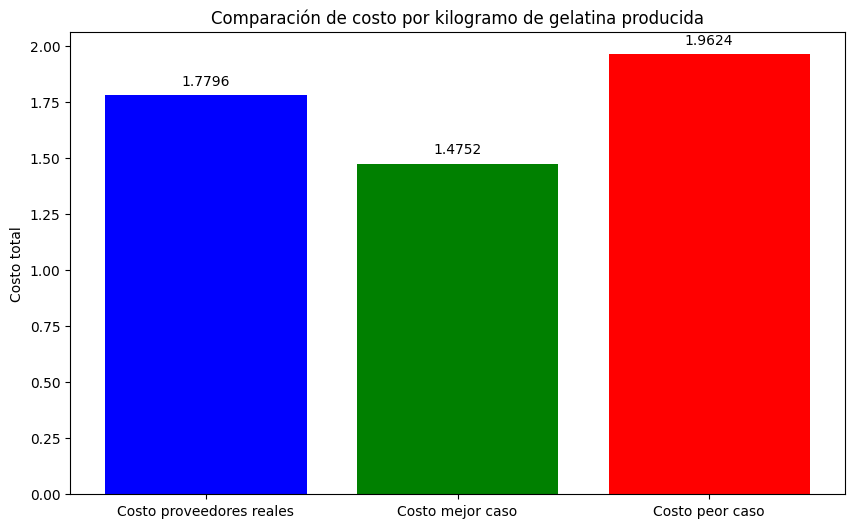

In [120]:
# Gráfico de barras que compara el costo de la gelatina producida
plt.figure(figsize=(10, 6))
costos = [costo_gelatina, costo_gelatina_mejor, costo_gelatina_peor]
labels = ['Costo proveedores reales', 'Costo mejor caso', 'Costo peor caso']
colors = ['blue', 'green', 'red']

ax = plt.bar(labels, costos, color=colors)

# Agregar el valor en miles a lo alto de cada columna
for p in ax:
    height = p.get_height()
    plt.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Comparación de costo por kilogramo de gelatina producida')
plt.ylabel('Costo total')
plt.show()